## Building a Classification Model to predict Candidate Performance

In [1]:
## Importing the necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Importing the data set

data=pd.read_csv(r'C:\Users\IamFavoured\Desktop\IKEBUKWU\Database\Githubsite\HR.2\HRDataset_v14.csv')

### Dataset Exploration

In [3]:
data.head()  ##Top 5 Rows

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
data.shape  ## The number of rows and columns

(311, 36)

In [5]:
data.dtypes  ##datatype of columns

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [6]:
## Lets convert DOB, Date of Hire, Date of Termination, Dayslatelast30, Last Performance to pandas date time format

data.DOB=pd.to_datetime(data['DOB'])
data.DateofHire=pd.to_datetime(data['DateofHire'])
data.DateofTermination=pd.to_datetime(data['DateofTermination'])
data.LastPerformanceReview_Date=pd.to_datetime(data['LastPerformanceReview_Date'])
data.DaysLateLast30=pd.to_datetime(data['DaysLateLast30'])

In [7]:
## Lets Make Employee ID the index of the table i.e the unique identifier

data.set_index('EmpID', inplace=True)

In [8]:
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,1970-01-01,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,1970-01-01,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,1970-01-01,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,1970-01-01,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,1970-01-01,2


In [9]:
data.isnull().sum() ## Checking for null values in dataset

Employee_Name                   0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceScore                0
EngagementSurv

In [10]:
## Lets find the records with null values on the Date of Termination field

data.groupby(['TermReason']).max()[['DateofTermination']]

## Its logical, the null values on 'DateofTermination' fields are for personnel that are still employed thus no Date of Termination yet

,DateofTermination
TermReason,
Another position,2018-11-10
Fatal attraction,2018-08-19
Learned that he is a gangster,2016-02-19
N/A-StillEmployed,NaT
attendance,2018-09-27
career change,2017-12-28
gross misconduct,2016-02-08
hours,2017-09-26
maternity leave - did not return,2016-02-05


In [11]:
## Lets input a concurrent value for Date of Termination for employees that are still employed
## This is to clean our data set from all null values
## We will substitute todays date in the records where we have null values

from datetime import datetime
data['DateofTermination'].fillna(datetime.today().strftime('%Y-%m-%d'), inplace =True)

In [12]:
data.isnull().sum()   ### No null values..Yippee!!!

Employee_Name                 0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialP

In [13]:
pd.set_option('display.max_columns',None) ##So we can view all 36 columns without pandas concatenating our column length
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,2022-08-16,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,1970-01-01,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,1970-01-01,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,1970-01-01,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,2022-08-16,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,1970-01-01,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,1970-01-01,2


In [14]:
## I noticed some strings on the 'Term Reason' column i want to take off- lets quickly do that below and view our datasets
data['TermReason']=data.TermReason.str.replace('N/A-','')

In [15]:
data.head() ## Exploration & Cleaning done - our data is all set for the model

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,2022-08-16,StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,1970-01-01,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,1970-01-01,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,1970-01-01,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,2022-08-16,StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,1970-01-01,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,1970-01-01,2


## First Step to building a Model: Getting the dataset needed for the Model

In [16]:
## Lets call our new data 'new_data'

new_data =data[['MaritalDesc','RecruitmentSource','Department','Sex','PerformanceScore']]
new_data

,MaritalDesc,RecruitmentSource,Department,Sex,PerformanceScore
EmpID,,,,,
10026,Single,LinkedIn,Production,M,Exceeds
10084,Married,Indeed,IT/IS,M,Fully Meets
10196,Married,LinkedIn,Production,F,Fully Meets
10088,Married,Indeed,Production,F,Fully Meets
10069,Divorced,Google Search,Production,F,Fully Meets
...,...,...,...,...,...
10135,Single,LinkedIn,Production,M,Fully Meets
10301,Single,Google Search,Production,F,PIP
10010,Single,Employee Referral,IT/IS,F,Exceeds


In [17]:
## So the intention of this model is:
## To use the Marital Status, Recruitment Source, Department,and Sex to predict the Performace of the potential staff of the company

In [18]:
## Lets go ahead and get the value count of all the values in our new_data set
new_data.MaritalDesc.value_counts()

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

In [19]:
new_data.RecruitmentSource.value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

In [20]:
new_data.Department.value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [21]:
new_data.Sex.value_counts()

F     176
M     135
Name: Sex, dtype: int64

In [22]:
new_data.PerformanceScore.value_counts()

## This is our target column which is clearly imbalanced

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64

In [23]:
new_data.PerformanceScore.value_counts()/new_data.shape[0]

## This is an unbalanced dataset because our target column has uneven value counts
## Thus the metric that will be used to evaluate this model will be quite different from regular
## And we need to balance the data sets before proceeding
## Firstly, we need to split the data first before balancing it to prevent data leakage

Fully Meets          0.781350
Exceeds              0.118971
Needs Improvement    0.057878
PIP                  0.041801
Name: PerformanceScore, dtype: float64

In [24]:
### In building Machine learning Models, we convert the non-numeric data type into numerical data type
## There are several ways to this, either replace string data type with numeric directly or
## we encode our data type: Label and One Hot Encoding
## We will replace our non-numeric data type directly in this exercise
## First, lets group our values

### Grouping Column values for easy encoding

In [25]:
## I encountered an error in the next line code thus the need for this
## The essence of this code is to strip column values of spaces for easy indexing

new_data['Department']=new_data['Department'].apply(lambda x: str.strip(x))

C:\Users\IamFavoured\AppData\Local\Temp\ipykernel_14192\3409256648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Department']=new_data['Department'].apply(lambda x: str.strip(x))


In [26]:
## Firstly we will be grouping our column values into limited categories to make the model easier to use
## Marital status will be grouped to Single or Married
## Department willgrouped into Technical and non-Technical
## Recruitment Source will be grouped into Job_App, Referral and Others

new_data['MaritalDesc']=new_data['MaritalDesc'].replace(['Divorced','Separated','Widowed'], 'Married')
new_data['Department']=new_data['Department'].replace(['Production','IT/IS','Software Engineering'], 'Technical')
new_data['Department']=new_data['Department'].replace(['Sales','Admin Offices','Executive Office'], 'Non_Technical')
new_data['RecruitmentSource']=new_data['RecruitmentSource'].replace(['Indeed','LinkedIn'], 'Job_App')
new_data['RecruitmentSource']=new_data['RecruitmentSource'].replace(['Google Search','Diversity Job Fair','CareerBuilder','Website','Other','On-line Web application'], 'Other')

C:\Users\IamFavoured\AppData\Local\Temp\ipykernel_14192\2202028779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['MaritalDesc']=new_data['MaritalDesc'].replace(['Divorced','Separated','Widowed'], 'Married')
C:\Users\IamFavoured\AppData\Local\Temp\ipykernel_14192\2202028779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Department']=new_data['Department'].replace(['Production','IT/IS','Software Engineering'], 'Technical')
C:\Users\IamFavoured\AppData\Local\Temp\ipykernel_14192\2

In [27]:
## Lets Confirm if our code worked
new_data.MaritalDesc.value_counts()

Married    174
Single     137
Name: MaritalDesc, dtype: int64

In [28]:
new_data.RecruitmentSource.value_counts()

Job_App              163
Other                117
Employee Referral     31
Name: RecruitmentSource, dtype: int64

In [29]:
new_data.Department.value_counts()

Technical        270
Non_Technical     41
Name: Department, dtype: int64

## Encoding Column Values

In [30]:
## We will encode our target column differently from our features
## The target values are of the Ordinal Category type while
## the features are the Nominal Category type

In [31]:
## Our target column (y)
new_data['PerformanceScore']=new_data['PerformanceScore'].map({"PIP":0,"Needs Improvement":1,"Fully Meets":2,"Exceeds":3})

C:\Users\IamFavoured\AppData\Local\Temp\ipykernel_14192\1103723725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['PerformanceScore']=new_data['PerformanceScore'].map({"PIP":0,"Needs Improvement":1,"Fully Meets":2,"Exceeds":3})


In [32]:
## Our feature Column (X)
new_data = pd.get_dummies(new_data,columns =['MaritalDesc','RecruitmentSource','Department','Sex'])


In [33]:
## There is always a dummy variable trap when we hot encode our features
## and they cause perfect collinearity which yields some inaccuracy in our models
## To avoid these, we need to drop a column, if there are n unique values in a feature table
## Then we need to make 'n-1' number of dummy variables

new_data.drop(columns=['MaritalDesc_Married','RecruitmentSource_Other','Department_Non_Technical','Sex_F'], inplace=True)
new_data

,PerformanceScore,MaritalDesc_Single,RecruitmentSource_Employee Referral,RecruitmentSource_Job_App,Department_Technical,Sex_M
EmpID,,,,,,
10026,3,1,0,1,1,1
10084,2,0,0,1,1,1
10196,2,0,0,1,1,0
10088,2,0,0,1,1,0
10069,2,0,0,0,1,0
...,...,...,...,...,...,...
10135,2,1,0,1,1,1
10301,0,1,0,0,1,0
10010,3,1,1,0,1,0


In [34]:
new_data.head()

,PerformanceScore,MaritalDesc_Single,RecruitmentSource_Employee Referral,RecruitmentSource_Job_App,Department_Technical,Sex_M
EmpID,,,,,,
10026,3,1,0,1,1,1
10084,2,0,0,1,1,1
10196,2,0,0,1,1,0
10088,2,0,0,1,1,0
10069,2,0,0,0,1,0


## Splitting our data set into TRAIN AND TEST SET

In [35]:
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(new_data, test_size=0.2, random_state=42)

### Selecting out Features and Targets

In [36]:
X_train= Train.drop(columns='PerformanceScore')
y_train=Train.PerformanceScore
X_test= Test.drop(columns='PerformanceScore')
y_test=Test.PerformanceScore

In [37]:
X_train

,MaritalDesc_Single,RecruitmentSource_Employee Referral,RecruitmentSource_Job_App,Department_Technical,Sex_M
EmpID,,,,,
10228,0,0,1,1,1
10260,1,0,0,1,1
10224,0,0,1,1,1
10042,1,0,1,0,0
10105,1,0,0,1,0
...,...,...,...,...,...
10298,1,0,1,1,1
10276,1,0,1,1,1
10018,1,0,1,1,0


In [51]:
y_train

EmpID
10228    2
10260    2
10224    2
10042    2
10105    2
        ..
10298    0
10276    2
10018    3
10241    2
10159    2
Name: PerformanceScore, Length: 248, dtype: int64

### Over Sampling our Minority class using SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm=SMOTE(random_state=42,k_neighbors=5)

In [41]:
X_res,y_res =sm.fit_resample(X_train,y_train)

In [42]:
X_res.shape[0]==y_res.shape[0]

True

In [43]:
y_res.value_counts()

2    189
3    189
0    189
1    189
Name: PerformanceScore, dtype: int64

In [44]:
## We can then go ahead to build our ML Model
## The first step is to get our datasets which are our features(X) and our target(y)
## The X is our independent variable
## The y is our dependent variable

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
modell=RandomForestClassifier()

In [47]:
modell.fit(X_res,y_res)

RandomForestClassifier()

In [48]:
modell.score(X_res,y_res)

0.6402116402116402

In [49]:
modell.score(X_test,y_test)

0.4444444444444444

## Selecting our Classification model

In [53]:
## Lets plot a scatter plot to enable us determine the best model to use
## We are going to create a new data where the target values are unique
## Then plot a graph of the independent variables for the unique data set and see if there is a way to visually classify them

In [54]:
dat0 =new_data[new_data['PerformanceScore'] == 0]
dat1 =new_data[new_data['PerformanceScore'] == 1]
dat2 =new_data[new_data['PerformanceScore'] == 2]
dat3 =new_data[new_data['PerformanceScore'] == 3]

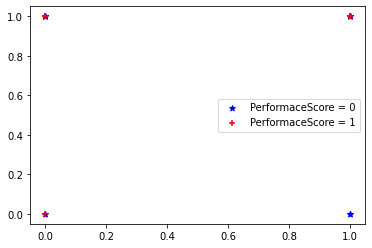

In [56]:
plt.scatter(dat0['MaritalDesc_Single'],dat0['Department_Technical'], color='blue', marker='*', label ='PerformaceScore = 0')
plt.scatter(dat1['MaritalDesc_Single'],dat1['Department_Technical'], color='red', marker='+',label ='PerformaceScore = 1')
plt.legend(loc='best');

## There is no way to visually classify them because some of their points are overlapping
## So we are going to use a decision tree classifier/Random Forest Classifier for this classification model
## Lets go ahead and import the model in the next cell

## Over Sampling our Imbalanced Datasets Using SMOTE

In [57]:
## The target column in our dataset is imbalanced
## We will be balancing it using SMOTE technique
## SMOTE stands for 'synthetic minority over-sampling Technique'

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
## Instantiating the object as a class

sm=SMOTE(random_state=42, k_neighbors=6)

In [60]:
X_res,y_res=sm.fit_resample(X_train,y_train)

In [61]:
##Confirming equal number or rows

X_res.shape[0]==y_res.shape[0]

True

In [63]:
## Checking if our target column is balanced

y_res.value_counts()

2    189
3    189
0    189
1    189
Name: PerformanceScore, dtype: int64

## Importing our Classification Model

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model=DecisionTreeClassifier()

## Using Parameter tunning to optimize our model- GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid=GridSearchCV(model,param_grid={'criterion' : ["gini", "entropy", "log_loss"],'splitter' : ["best", "random"],
                                   'min_samples_split': [x for x in range(2,10)]},cv=6,return_train_score=False)

In [68]:
grid.fit(X_res,y_res)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [69]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_split=9,
                       splitter='random')

In [71]:
grid.best_score_

0.5529100529100529

In [101]:
y_pred =grid.predict(X_test)

## Classification Report

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
print(classification_report(y_test,y_pred,zero_division=1));

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.14      0.25      0.18         4
           2       0.81      0.48      0.60        54
           3       0.08      0.20      0.12         5

    accuracy                           0.44        63
   macro avg       0.26      0.48      0.23        63
weighted avg       0.71      0.44      0.54        63



In [104]:
print(confusion_matrix(y_test,y_pred))

[[ 0  0  0  0]
 [ 1  1  2  0]
 [11  6 26 11]
 [ 0  0  4  1]]


In [105]:
y_test.value_counts()

2    54
3     5
1     4
Name: PerformanceScore, dtype: int64